# Programming Session 1

## Goals

-   Parsing and working with CSV, TSV and JSON files
-   Querying external data sources
-   Data analyses

### Exercises

1.  Parsing and reading CSV/TSV files
2.  Parsing and reading JSON files
3.  Querying external data sources (Query endpoints and API)
4.  Performing classical data analyses



### Screenshots

Screenshots have been provided so that you can check and compare whether the output you have is the same as what we want from the step (or exercise) in question.

## Exercise 1 ★


We first install the necessary packages.In Jupyter notebooks, you can use the `!` command to run shell commands directly from a notebook cell. To install Python packages such as NumPy, pandas, you can use the following command:

In [ ]:
!pip3 install numpy pandas matplotlib sparqlwrapper

To import the NumPy, pandas libraries in a Jupyter notebook, you use the following Python import statements:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plot
import SPARQLWrapper as sw

The `__version__ `attribute is a common way to access the version information of a Python package.

In [ ]:
print(np.__version__)
print(pd.__version__)
print(plot.__version__)
print(sw.__version__)

Practise the exercises given in [practicals 0](../practical0/practical0.ipynb).

## Exercise 2 ★

Most of the time, we work with CSV (comma-separated values) files for
data analysis. A CSV file consits of one or more lines and each line has
one or more values separated by commas. One can consider every line as a
row and every value in a row as a column value. The first row is
sometimes used to describe the column names.

Copy the file
[pl.csv](../../data/pl.csv) to
your current working directory (where you are running Jupyter: TP1) and
use the following code to parse the csv file. Note the column names and
datatypes (U100, i4), where U100 corresponds to 100-character unicode string and i4 corresponds to 32-bit signed integer.

Please check the complete list of dtypes [here](https://numpy.org/doc/stable/reference/arrays.dtypes.html).


In [ ]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.csv",  # Change this value to the path of your CSV file
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,  # skip the first row, since it's the header
    delimiter=",",  # the separator is comma since it is a CSV file
    encoding="UTF-8",  # UTF-8 encoding
)
print(dataset)

- **`np.loadtxt`**: This function loads data from a text file, with each row in the text file being converted to a NumPy array element.
- **`"../data/pl.csv"`**: The path to the CSV file. You need to change this to the actual path where your CSV file is located.
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`**: Specifies the data type for the resulting NumPy array. Here, `dtype` is defined as a dictionary with:
  - `names`: A tuple specifying the names of the columns.
  - `formats`: A tuple specifying the data type of each column. `"U100"` stands for a Unicode string of maximum length 100, and `"i4"` stands for a 4-byte integer.
- **`skiprows=1`**: This parameter skips the first row of the CSV file, which is assumed to be the header.
- **`delimiter=","`**: Specifies the delimiter that separates the values in the CSV file. Here, it is a comma.
- **`encoding="UTF-8"`**: Specifies the encoding of the file. UTF-8 is a common encoding for text files.

### Important Notes:

1. **File Path**: Ensure the file path (`"../data/pl.csv"`) is correct relative to your Jupyter notebook or script. You might need to adjust it depending on where your CSV file is located.
2. **CSV File Structure**: The CSV file should have a header row that matches the column names specified in the `dtype` parameter, and the data should follow in subsequent rows.
3. **Column Data Types**: Ensure that the data types (`"U100"` for strings and `"i4"` for integers) match the actual data in your CSV file.


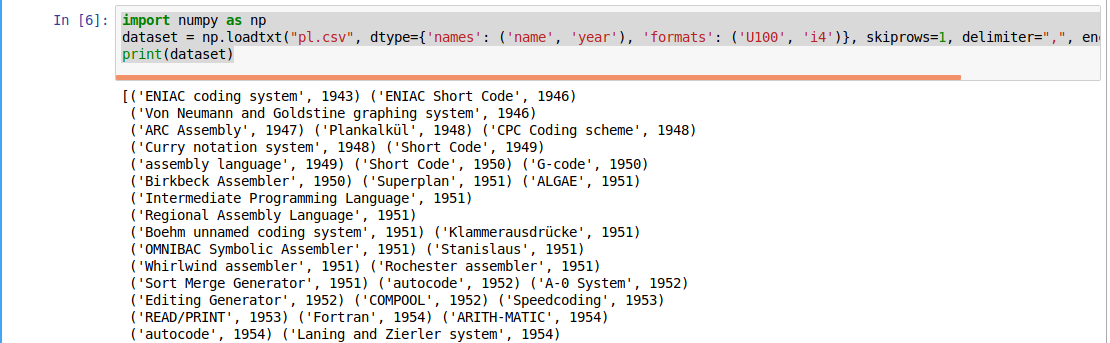

[CSV support in
numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html))
is different from Python's default [CSV
reader](https://docs.python.org/3.9/library/csv.html) (**Ref:**
(https://docs.python.org/3.9/library/csv.html))
because of its capability to support the [data
types](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)).
Before continuing, take a deep look at
[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)).

  

Copy the file
[pl.tsv](../../data/pl.tsv) to
your current working directory and use the following code to parse the
tsv file.



In [ ]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.tsv",  # Change this value to the path of your CSV file
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,
    delimiter="\t",
    encoding="UTF-8",
)
print(dataset)

Note the changes in the above code compared to the previous one. A TSV
file is a tab-separated file, i.e., the column values are separated by a
tab ((\\t)).



- **`np.loadtxt`**: This function loads data from a text file, with each row in the text file being converted to a NumPy array element.
- **`"../data/pl.tsv"`**: The path to the TSV file. You need to change this to the actual path where your TSV file is located.
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`**: Specifies the data type for the resulting NumPy array. Here, `dtype` is defined as a dictionary with:
  - `names`: A tuple specifying the names of the columns.
  - `formats`: A tuple specifying the data type of each column. `"U100"` stands for a Unicode string of maximum length 100, and `"i4"` stands for a 4-byte integer.
- **`skiprows=1`**: This parameter skips the first row of the TSV file, which is assumed to be the header.
- **`delimiter="\t"`**: Specifies the delimiter that separates the values in the TSV file. Here, it is a tab character.
- **`encoding="UTF-8"`**: Specifies the encoding of the file. UTF-8 is a common encoding for text files.

For counting the number of rows in your dataset, you can use `len()`

In [ ]:
# Print the number of elements in the dataset
print(len(dataset))

You can also display the output of variables and methods in a notebook without `print()`

In [ ]:
len(dataset)

### Explore Column-Wise Data Access

Extract and print only the "name" column from the dataset.

In [ ]:
dataset["name"]

Extract and print only the "year" column from the dataset.

In [ ]:
dataset["year"]

### Filter Data by Year

Find and print all rows where the year is greater than 1960.

In [ ]:
filtered_data = dataset[dataset["year"] > 1960]
filtered_data

### Handle Missing or Incorrect Data

Check the following code which contains some missing values

In [ ]:
import numpy as np

# Save a modified CSV file with a missing value (manually or via script)
np.savetxt("pl_missing.csv", [("Simula", 1962), ("Swift", "")],  header="name,year", delimiter=",", fmt="%s")

# Attempt to load with np.loadtxt (will cause an error)
try:
    dataset_with_missing_values = np.loadtxt("pl_missing.csv", dtype={"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",")
except ValueError as e:
    print("Error:", e)

In [ ]:
# Load using np.genfromtxt (handles missing values)
dataset_with_missing_values = np.genfromtxt("pl_missing.csv", {"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",", encoding="UTF-8")
dataset_with_missing_values

Using filling_values for a Specific Column

In [ ]:
# Load the dataset with default values for missing entries
dataset_with_missing_values = np.genfromtxt(
    "pl_missing.csv",
    dtype=[("name", "U100"), ("year", "i4")],
    delimiter=",",
    names=True,  # First row contains column names
    encoding="UTF-8",
    missing_values="",  # Treat empty values as missing
    filling_values={"year": 0}  # Replace missing years with 0
)

dataset_with_missing_values

`np.loadtxt()` will raise an error due to missing values. `np.genfromtxt()` will load the dataset, replacing missing values with nan or a default value.

### Convert Data to Pandas DataFrame

In [ ]:
import pandas as pd

# Convert NumPy structured array to Pandas DataFrame
df = pd.DataFrame(dataset)

# Print datafram
df

**Question**: What is the difference between np.loadtxt() and np.genfromtxt() when reading CSV files? When should you prefer one over the other?

## Exercise 3 ★★

Most of the external data sources may provide their data in JSON format.
Our next exercise is to parse JSON files. Copy the file
[pl.json](../../data/pl.json) to
your current working directory and use the following code to parse the
JSON file. In this exercise, we use [Pandas python
package](https://pandas.pydata.org/pandas-docs/stable/) (**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/)) to
parse the JSON file to obtain a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)).
Try using methods like
[transpose](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)),
[count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count))
etc.

Before continuing this exercise, please practice working with Pandas.
Take a look at [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
(**Ref:** (https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)).



In [ ]:
from pandas import json_normalize
import pandas as pd
import json

# Load JSON data from a file
data = json.load(open("../../data/pl.json"))

# Convert JSON data to a pandas DataFrame
dataframe = json_normalize(data)

print(dataframe)

This code is using Python's pandas library to work with JSON data.

*. **Imports**: 
   - `from pandas import json_normalize`: Imports the `json_normalize` function from the pandas library. This function is used to flatten JSON data into a DataFrame.
   - `import pandas as pd`: Imports the pandas library with the alias `pd`, which is a common convention.
   - `import json`: Imports Python's built-in `json` module for handling JSON data.

*. **Loading JSON Data**:
   - `data = json.load(open("../data/pl.json"))`: Opens a JSON file located at `"../data/pl.json"` and loads its contents into the `data` variable. The `json.load()` function reads the JSON file and parses it into a Python dictionary.

* **Normalizing JSON into a DataFrame**:
   - `dataframe = json_normalize(data)`: Uses the `json_normalize()` function from pandas to convert the nested JSON data (`data`) into a flat table-like structure called a DataFrame. This step is particularly useful for analyzing structured JSON data where nested objects or arrays need to be represented in tabular form.


And the output without `print()`

In [ ]:
dataframe

To display the values of the column **year**:

In [ ]:
# Select the "year" column from the dataframe
dataframe["year"]

To display the values of the column **languageLabel**:

In [ ]:
# Select the "languageLabel" column from the dataframe
dataframe["languageLabel"]

Getting some important information like count, min, max using the method `describe()`. By default, it focuses on numerical columns (containing numbers) and calculates statistics like mean, standard deviation, quartiles (like 25th and 75th percentile), minimum and maximum values.

In [ ]:
# Get some descriptive summary of the dataframe
dataframe.describe()

The `dataframe.describe()` method in pandas generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. Here's what each part typically includes:

1. **Count**: Number of non-null observations (rows) in each column.
   
2. **Mean**: Average value of each numerical column.

3. **Std (Standard Deviation)**: Measures the dispersion or spread of the values in each numerical column.

4. **Min**: The smallest value in each numerical column.

5. **25% (Percentile)**: The value below which 25% of the observations fall (1st quartile).

6. **50% (Median)**: The median or 50th percentile.

7. **75% (Percentile)**: The value below which 75% of the observations fall (3rd quartile).

8. **Max**: The largest value in each numerical column.


When you call `describe()` on a pandas DataFrame (`dataframe` in this case), it analyzes only the numerical columns by default and provides the statistical summary for each of these columns. Non-numerical columns are ignored unless specifically included by using additional parameters.

This method is useful for quickly getting an overview of your dataset's numeric values, identifying outliers, understanding the distribution of your data, and more.

In [ ]:
# Get the unique years from the "year" column
dataframe["year"].unique()

To display the unique values of the column **year**:

In [ ]:
dataframe["year"].unique()

Note that the order of unique values returned by .unique() is not guaranteed.

To display the unique values of the column **languageLabel**:

In [ ]:
# Get the unique languages from the "languageLabel" column
dataframe["languageLabel"].unique()

To sort the values by one or more columns:

In [ ]:
dataframe.sort_values(["year"])

`.sort_values(["year"])` sorts the DataFrame by the values in the column named "year". You can specify one or more columns to sort by. By default, sorting is done in ascending order.

In [ ]:
dataframe.sort_values(["year", "languageLabel"])

In [ ]:
dataframe.sort_values(["languageLabel"])

To obtain the data types of the columns:

In [ ]:
# Get the data types of each column in the dataframe
dataframe.dtypes

The `dataframe.dtypes` attribute in pandas returns the data types of each column in the DataFrame `dataframe`. It provides information about how pandas has interpreted the data from the JSON (or any other source) based on its initial reading and normalization process. Here's what you'll typically see:

- **Numeric Types**: Integers (`int64`), Floating-point numbers (`float64`).
- **Object Type**: Typically strings (`object`), but can also include other Python objects.
- **DateTime Types**: If applicable, pandas will recognize and label date/time data appropriately (`datetime64`).
- **Categorical Types**: If pandas identifies a column with a small number of unique values, it may assign it a `category` dtype, which can optimize memory usage and speed up certain operations.

### Handling Missing Values
- Identify missing values in the dataset.
- Replace missing values in the "year" column with the median year.
- Replace missing values in categorical columns (e.g., "languageLabel") with "Unknown".

In [ ]:
dataframe["year"] = pd.to_numeric(dataframe["year"], errors="coerce")

# Identify missing values
print(dataframe.isnull().sum())

# Fill missing values in "year" with the median value
dataframe["year"].fillna(dataframe["year"].median(), inplace=True)
# Fill missing values in "languageLabel" with "Unknown"
dataframe["languageLabel"].fillna("Unknown", inplace=True)

### Filtering Data
- Extract all rows where the "year" is greater than 2000.
- Extract all rows where "languageLabel" is "English".

In [ ]:
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})

In [ ]:
# Filter rows where "year" is greater than 1960
filtered_year = dataframe[dataframe["year"] > 1960]
filtered_year

In [ ]:
# Filter rows where "languageLabel" is "BCPL"
filtered_language = dataframe[dataframe["languageLabel"] == "BCPL"]
print(filtered_language)

### Grouping and Aggregation
- Count how many entries exist per "languageLabel".
- Count how many entries exist per "year".

In [ ]:
# Count occurrences of each language
language_counts = dataframe["languageLabel"].value_counts()
print(language_counts)

In [ ]:
# Count occurrences of each year
language_counts = dataframe["year"].value_counts()
print(language_counts)

### Exporting Data

Save the modified dataframe to a new JSON file.

In [ ]:
# Save to JSON file
dataframe.to_json("modified_pl.json", orient="records", indent=4)

Save it as a CSV file as well.

In [ ]:
# Save to CSV file
dataframe.to_csv("modified_pl.csv", index=False)

**Question:**  What is the difference between `json.load()` and `json.loads()` in Python?  

## Exercise 4 ★★

In this exercise, we will take a look at how to download data from
external data sources using special query interfaces. Take for example,
above data was obtained from [Wikidata query](https://query.wikidata.org/):**
(https://query.wikidata.org/)) interface.
See the screenshot given below.

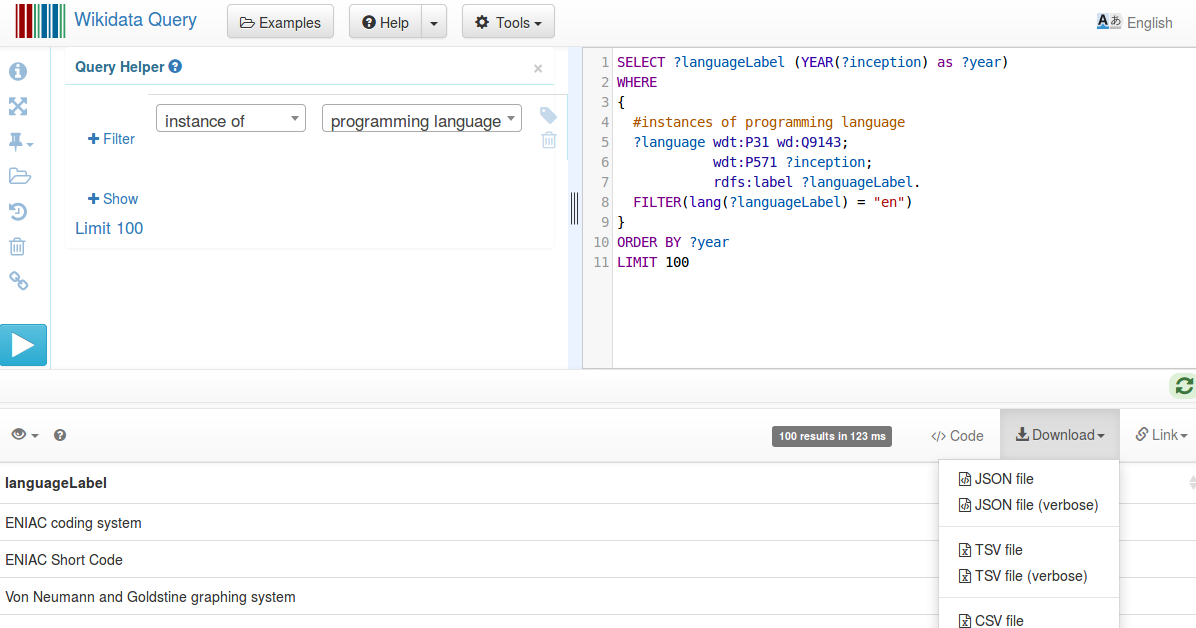

Given below is the code to read data from an external data source. Use
this
[url](https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json):
(https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json).



In [ ]:
import urllib.request
import json
import pandas as pd

url = "https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json"
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))

array = []

for data in responsedata["results"]["bindings"]:
    array.append([data["year"]["value"], data["languageLabel"]["value"]])

dataframe = pd.DataFrame(array, columns=["year", "languageLabel"])
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})
print(dataframe)

In [ ]:
dataframe

In [ ]:
# Get some descriptive summary of the dataframe
dataframe.describe()

In [ ]:
# Get some descriptive summary of the year column
dataframe["year"].describe()

In [ ]:
# Get some descriptive summary of the languageLabel column
dataframe["languageLabel"].describe()

In [ ]:
# Get the data types of each column in the dataframe
dataframe.dtypes

### Filter Data for a Specific Time Period

You can filter the data to get programming languages that were invented in a specific range of years (e.g., between 1980 and 2000). This can be useful if you're only interested in languages created during a certain period.

In [ ]:
# Filter programming languages created between 1980 and 2000
filtered_df = dataframe[(dataframe["year"] >= 1980) & (dataframe["year"] <= 2000)]
print(filtered_df)


Count Languages per Year: A useful operation could be to count how many languages were invented each year. This can give you a better understanding of trends in programming language creation.

In [ ]:
# Count the number of languages created per year
languages_per_year = dataframe.groupby("year").size()
print(languages_per_year)


Identify Languages With the Most Recent Inception: Another interesting question to ask could be which language has the most recent inception date. We can sort the dataframe by year and find the latest entries.

In [ ]:
# Sort the dataframe by year and get the most recent languages
recent_languages = dataframe.sort_values("year", ascending=False).head(10)
print(recent_languages)


**Question**: 

What is the trend in the number of programming languages being created over time? Based on the filtered data (for languages created between 1960 and 2000), identify the year with the highest number of programming languages created. Furthermore, create a new dataframe containing only the top 5 most popular programming languages (by count) during this period.

## Exercise 5 ★★★

This exercise will use some basic data analyses. Continuing with
the code in Exercise 4, le's count the number of programming
languages released in a year.

In [ ]:
grouped = dataframe.groupby("year").count()
grouped

The above code creates a new DataFrame `grouped` by grouping the original DataFrame `dataframe` based on the values in the column named "year", and then counting the occurrences in each group.

You can also use multiple aggregate functions using agg()

In [ ]:
grouped = dataframe.groupby("year").agg(["count"])
grouped

Till now, we worked with tables having two columns. Now we focus on
tables with three columns (programming language, year, paradigm). Copy
the file
[plparadigm.json](../../data/plparadigm.json)
to your working directory. And test the following program.



In [ ]:
from pandas import json_normalize
import pandas as pd
import json

# Load JSON data from a file
jsondata = json.load(open("../../data/plparadigm.json"))

# Create an empty list to store temporary data
array = []

# Loop through each item in the JSON data
for data in jsondata:
    # Extract specific values from each item and append them to the list
    # Assuming "year", "languageLabel", and "paradigmLabel" are keys in the JSON data
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])

# Create a pandas DataFrame from the list with named columns
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])

# Set data types for the columns in the DataFrame
# This ensures efficient storage and avoids potential errors during operations
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)

# Group the DataFrame by "year" and "paradigmLabel" columns
grouped = dataframe.groupby(["year", "paradigmLabel"]).agg(["count"])
grouped

Now test the following program. Compare the difference in output.

In [ ]:
grouped = dataframe.groupby(["paradigmLabel", "year"]).agg(["count"])
grouped

Your next goal is to run the following query to get the population
information of different countries (limited to 10000 rows). Run the
following query on [Wikidata query service](https://query.wikidata.org)
and download the JSON file.



```
SELECT DISTINCT ?countryLabel (YEAR(?date) as ?year) ?population
WHERE {
 ?country wdt:P31 wd:Q6256; #Country 
   p:P1082 ?populationStatement;
  rdfs:label ?countryLabel. #Label
 ?populationStatement ps:P1082 ?population; #population
  pq:P585 ?date. #period in time
 FILTER(lang(?countryLabel)="en") #Label in English
}
ORDER by ?countryLabel ?year
LIMIT 5000
```
              



**Question 1**:

Now, compute and display the following information (using various
[operations available in pandas library](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  The population of countries in alphabetical order of their names and
    ascending order of year.
2.  The latest available population of every country
3.  The country with the lowest and highest population (considering the
    latest population)

**Question 2** :

Your next goal is to run the following query to get information related
to scientific articles published after 2010 (limited to 5000 rows). Run
the following query on [Wikidata query service](https://query-scholarly.wikidata.org/) and download the JSON file.
It gives you the following information related to the scientific
article: title, main subject and publication year.

**Note** : Please note the URL for querying scientific articles is [https://query-scholarly.wikidata.org/](https://query-scholarly.wikidata.org/).

```
SELECT ?title ?subject ?year
{
  ?article wdt:P31 wd:Q13442814; #scientific article
           wdt:P1476 ?title; #title of the article
           wdt:P921 ?subject; #main subject
           wdt:P577 ?date. #publication date
  BIND(YEAR(?date) as ?year).
  FILTER(lang(?title) = "en" && ?year>2010)
}
LIMIT 5000
```



Now, compute and display the following information (using various
[operations available in pandas
library](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  The number of articles published on different subjects every year.
2.  Top subject of interest to the scientific community every year(based
    on the above query results).
3.  Top 10 subjects of interest to the scientific community (based on
    the above query results) since 2010.

**Hint**:Take a look at functions groupby, reset_index, head, tail, sort_values, count of Pandas



**Note**: If you get time-out errors, please change the LIMIT to some lower values (1000, 2000, 5000).

## Exercise 6 ★★★

In our final exercise, we will query Wikidata and obtain the URLs of the images. Then we will download these images.

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?bigcity ?bigcityLabel ?country ?countryLabel ?image {
  ?bigcity wdt:P31 wd:Q1549591;
               wdt:P17 ?country;
               wdt:P18 ?image.
 SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 10"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["bigcityLabel"]["value"],
            result["countryLabel"]["value"],
            result["image"]["value"],
        )
    )

In [ ]:
dataframe = pd.DataFrame(array, columns=["city", "country", "image"])
dataframe = dataframe.astype(
    dtype={"city": "<U200", "country": "<U200", "image": "<U200"}
)
dataframe

We will now download these images

In [ ]:
import requests
import shutil
import os


def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        with open(os.path.basename(url), "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code

In [ ]:
dataframe.image.apply(download_image)

**Question 1**

Modify the above code and download images related to any subject of your choice (cities, historical monuments, flowers, buildings, etc.)

**Question 2**

Your next goal is to retrieve skyscraper ([Q11303](https://www.wikidata.org/wiki/Q11303)) data (name, country, image, height) from Wikidata and download and filter images based on size. 
Use image processing code below to classify skyscrapers based on their skyline contrast (daytime vs. nighttime images).

Which country has the most skyscrapers appearing in nighttime images?

In [ ]:
! pip install opencv-python

In [ ]:
import cv2
import numpy as np

def classify_day_night(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    brightness = np.mean(img)  # Compute average pixel brightness

    if brightness < 60:  # Dark images are nighttime
        return "nighttime"
    return "daytime"